In [1]:
!pip install seaborn


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [2]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


df = sns.load_dataset('titanic')

le = LabelEncoder()
le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])

le = LabelEncoder()
le.fit(df['embarked'])
df['embarked'] = le.transform(df['embarked'])

le = LabelEncoder()
le.fit(df['class'])
df['class'] = le.transform(df['class'])

df['age'].fillna(df['age'].median(), inplace=True)

X = df[['pclass', 'sex', 'fare', 'age', 'class', "embarked"]] # 説明変数
Y = df['survived']
x_train, x_test, y_train, y_test = train_test_split(X.values, Y.values, test_size = 0.2, random_state = 0) # 80%のデータを学習データに、20%を検証データにする

In [3]:
X

,pclass,sex,fare,age,class,embarked
0,3,1,7.2500,22.0,2,2
1,1,0,71.2833,38.0,0,0
2,3,0,7.9250,26.0,2,2
3,1,0,53.1000,35.0,0,2
4,3,1,8.0500,35.0,2,2
...,...,...,...,...,...,...
886,2,1,13.0000,27.0,1,2
887,1,0,30.0000,19.0,0,2
888,3,0,23.4500,28.0,2,2
889,1,1,30.0000,26.0,0,0


In [4]:
import pandas as pd

# Assuming X is a pandas DataFrame
nan_values = X.isnull().sum()
print(nan_values)


pclass      0
sex         0
fare        0
age         0
class       0
embarked    0
dtype: int64


In [5]:
from sklearn.linear_model import LogisticRegression, LinearRegression

model = LogisticRegression()

In [6]:
# 学習
model.fit(x_train, y_train)

# 予測
pred = model.predict(x_test)


In [7]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[91 19]
 [17 52]]
accuracy =  0.7988826815642458
precision =  0.7323943661971831
recall =  0.7536231884057971
f1 score =  0.7428571428571428


In [9]:
from metamodel.binary import BinaryMetaModel

metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LogisticRegression()
)

In [10]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


/opt/homebrew/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
pred

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=pred))
print('precision = ', precision_score(y_true=y_test, y_pred=pred))
print('recall = ', recall_score(y_true=y_test, y_pred=pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=pred))


confusion matrix = 
 [[96 14]
 [21 48]]
accuracy =  0.8044692737430168
precision =  0.7741935483870968
recall =  0.6956521739130435
f1 score =  0.732824427480916


In [13]:
metamodel = BinaryMetaModel(
    model1=LogisticRegression(),
    model2=LinearRegression()
)

In [14]:
# 学習
metamodel.fit(x_train, y_train)

# 予測
pred = metamodel.predict(x_test)


In [15]:
pred

array([[-0.02329857],
       [-0.05632462],
       [-0.01475799],
       [ 0.86204747],
       [ 0.70045497],
       [ 0.1315768 ],
       [ 0.80851053],
       [ 0.81831672],
       [ 0.52981896],
       [ 0.70392046],
       [-0.05357475],
       [ 0.7475706 ],
       [-0.03897879],
       [ 0.79083713],
       [ 0.88391881],
       [ 0.68876056],
       [-0.04968398],
       [ 0.04581464],
       [-0.06634963],
       [ 0.01721638],
       [ 0.05369054],
       [ 0.83444953],
       [-0.03897559],
       [ 0.13144884],
       [ 0.67694208],
       [ 0.8481575 ],
       [-0.06206858],
       [ 0.67747631],
       [ 0.76545156],
       [ 0.70059675],
       [-0.02888461],
       [ 0.73407177],
       [-0.05682367],
       [ 0.13029719],
       [-0.05760945],
       [ 0.53542548],
       [-0.07725106],
       [ 0.03980783],
       [ 0.04340961],
       [ 0.00215164],
       [ 0.10866379],
       [-0.01720582],
       [-0.05810328],
       [-0.04475524],
       [ 0.83349121],
       [-0

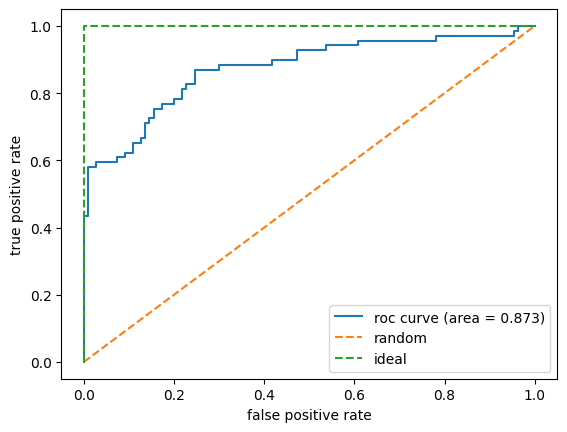

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=pred)

plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], linestyle='--', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle='--', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()
